<a href="https://colab.research.google.com/github/jesusGS01/BDGE/blob/main/mongo/sesion3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NoSQL (MongoDB) (sesión 3)


![MongoDB](https://webassets.mongodb.com/_com_assets/cms/MongoDB_Logo_FullColorBlack_RGB-4td3yuxzjs.png)

Esta hoja muestra cómo acceder a bases de datos MongoDB y también a conectar la salida con Jupyter. Se puede utilizar el *shell* propio de MongoDB. La diferencia es que ese programa espera código Javascript y aquí trabajaremos con Python.

A continuación unas comprobaciones iniciales.

In [1]:
RunningInCOLAB = 'google.colab' in str(get_ipython()) if hasattr(__builtins__,'__IPYTHON__') else False

In [2]:
db_hostname = "localhost" if RunningInCOLAB else "mongo"

## Instalación inicial de MongoDB (no necesaria si se utiliza Docker en local)


In [3]:
!wget -qO - https://www.mongodb.org/static/pgp/server-6.0.asc | sudo gpg --dearmor > /etc/apt/trusted.gpg.d/mongo-server-6.gpg

In [4]:
%%bash
sudo adduser --system --no-create-home mongodb
sudo addgroup --system mongodb
sudo adduser mongodb mongodb

# create db -- note: this should agree with dbpath in mongod.conf
if [ ! -d /var/lib/mongodb ]; then
  sudo mkdir -p /var/lib/mongodb
  sudo chown mongodb:mongodb /var/lib/mongodb
fi

# create logdir -- note: this should agree with logpath in mongod.conf
if [ ! -d /var/log/mongodb ]; then
  sudo mkdir -p /var/log/mongodb
  sudo chown mongodb:mongodb /var/log/mongodb
fi

Adding system user `mongodb' (UID 104) ...
Adding new user `mongodb' (UID 104) with group `nogroup' ...
Not creating home directory `/home/mongodb'.
Adding group `mongodb' (GID 107) ...
Done.
Adding user `mongodb' to group `mongodb' ...
Adding user mongodb to group mongodb
Done.


In [5]:
!echo "deb [ arch=amd64,arm64 ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/6.0 multiverse" | sudo tee /etc/apt/sources.list.d/mongodb-org-6.0.list

deb [ arch=amd64,arm64 ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/6.0 multiverse


In [6]:
!sudo apt-get update -qq

In [7]:
!sudo ln -sf /bin/true /bin/systemctl

In [8]:
!sudo apt-get install -y -qq dialog mongodb-org

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 10.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package dialog.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../0-dialog_1.3-20211214-1_amd64.deb ...
Unpacking dialog (1.3-20211214-1) ...
Selecting previously unselected package mongodb-database-tools.
Preparing to unpack .../1-mongodb-database-tools_100.9.0_amd64.deb ...
Unpacking mongodb-database-tools (100.9.0) ...
Selecting previously unselected package mongodb-mongosh.
Preparing to unpack .../2-mongodb-mongosh_2.0.2_amd64.deb ...
Unpacking mongodb-mongosh (2

In [9]:
!sudo /usr/bin/mongod --config /etc/mongod.conf --fork

about to fork child process, waiting until server is ready for connections.
forked process: 2362
child process started successfully, parent exiting


In [10]:
!sudo mongod --version

db version v6.0.11
Build Info: {
    "version": "6.0.11",
    "gitVersion": "f797f841eaf1759c770271ae00c88b92b2766eed",
    "openSSLVersion": "OpenSSL 3.0.2 15 Mar 2022",
    "modules": [],
    "allocator": "tcmalloc",
    "environment": {
        "distmod": "ubuntu2204",
        "distarch": "x86_64",
        "target_arch": "x86_64"
    }
}


## Inicio de la hoja


In [11]:
!pip install --upgrade pymongo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.3/671.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 27.1 MB/s eta 0:00:00


In [12]:
from pprint import pprint as pp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')

Usaremos la librería `pymongo` para python. La cargamos a continuación.

In [13]:
import pymongo
from pymongo import MongoClient

La conexión se inicia con `MongoClient` en el `host` descrito en el fichero `docker-compose.yml` (`mongo`), o bien a `localhost` si lo estamos haciendo en Colab.

In [14]:
client = MongoClient(db_hostname,27017)
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [15]:
client.list_database_names()

['admin', 'config', 'local']

 - Format: 7zipped
 - Files:
   - **badges**.xml
       - UserId, e.g.: "420"
       - Name, e.g.: "Teacher"
       - Date, e.g.: "2008-09-15T08:55:03.923"
   - **comments**.xml
       - Id
       - PostId
       - Score
       - Text, e.g.: "@Stu Thompson: Seems possible to me - why not try it?"
       - CreationDate, e.g.:"2008-09-06T08:07:10.730"
       - UserId
   - **posts**.xml
       - Id
       - PostTypeId
          - 1: Question
          - 2: Answer
       - ParentID (only present if PostTypeId is 2)
       - AcceptedAnswerId (only present if PostTypeId is 1)
       - CreationDate
       - Score
       - ViewCount
       - Body
       - OwnerUserId
       - LastEditorUserId
       - LastEditorDisplayName="Jeff Atwood"
       - LastEditDate="2009-03-05T22:28:34.823"
       - LastActivityDate="2009-03-11T12:51:01.480"
       - CommunityOwnedDate="2009-03-11T12:51:01.480"
       - ClosedDate="2009-03-11T12:51:01.480"
       - Title=
       - Tags=
       - AnswerCount
       - CommentCount
       - FavoriteCount
   - **posthistory**.xml
	   - Id
	   - PostHistoryTypeId
			- 1: Initial Title - The first title a question is asked with.
			- 2: Initial Body - The first raw body text a post is submitted with.
			- 3: Initial Tags - The first tags a question is asked with.
			- 4: Edit Title - A question's title has been changed.
			- 5: Edit Body - A post's body has been changed, the raw text is stored here as markdown.
			- 6: Edit Tags - A question's tags have been changed.
			- 7: Rollback Title - A question's title has reverted to a previous version.
			- 8: Rollback Body - A post's body has reverted to a previous version - the raw text is stored here.
			- 9: Rollback Tags - A question's tags have reverted to a previous version.
			- 10: Post Closed - A post was voted to be closed.
			- 11: Post Reopened - A post was voted to be reopened.
			- 12: Post Deleted - A post was voted to be removed.
			- 13: Post Undeleted - A post was voted to be restored.
			- 14: Post Locked - A post was locked by a moderator.
			- 15: Post Unlocked - A post was unlocked by a moderator.
			- 16: Community Owned - A post has become community owned.
			- 17: Post Migrated - A post was migrated.
			- 18: Question Merged - A question has had another, deleted question merged into itself.
			- 19: Question Protected - A question was protected by a moderator
			- 20: Question Unprotected - A question was unprotected by a moderator
			- 21: Post Disassociated - An admin removes the OwnerUserId from a post.
			- 22: Question Unmerged - A previously merged question has had its answers and votes restored.
		- PostId
		- RevisionGUID: At times more than one type of history record can be recorded by a single action.  All of these will be grouped using the same RevisionGUID
		- CreationDate: "2009-03-05T22:28:34.823"
		- UserId
		- UserDisplayName: populated if a user has been removed and no longer referenced by user Id
		- Comment: This field will contain the comment made by the user who edited a post
		- Text: A raw version of the new value for a given revision
			- If PostHistoryTypeId = 10, 11, 12, 13, 14, or 15  this column will contain a JSON encoded string with all users who have voted for the PostHistoryTypeId
			- If PostHistoryTypeId = 17 this column will contain migration details of either "from <url>" or "to <url>"
		- CloseReasonId
			- 1: Exact Duplicate - This question covers exactly the same ground as earlier questions on this topic; its answers may be merged with another identical question.
			- 2: off-topic
			- 3: subjective
			- 4: not a real question
			- 7: too localized
   - **postlinks**.xml
     - Id
     - CreationDate
     - PostId
     - RelatedPostId
     - PostLinkTypeId
       - 1: Linked
       - 3: Duplicate
   - **users**.xml
     - Id
     - Reputation
     - CreationDate
     - DisplayName
     - EmailHash
     - LastAccessDate
     - WebsiteUrl
     - Location
     - Age
     - AboutMe
     - Views
     - UpVotes
     - DownVotes
   - **votes**.xml
     - Id
     - PostId
     - VoteTypeId
        - ` 1`: AcceptedByOriginator
        - ` 2`: UpMod
        - ` 3`: DownMod
        - ` 4`: Offensive
        - ` 5`: Favorite - if VoteTypeId = 5 UserId will be populated
        - ` 6`: Close
        - ` 7`: Reopen
        - ` 8`: BountyStart
        - ` 9`: BountyClose
        - `10`: Deletion
        - `11`: Undeletion
        - `12`: Spam
        - `13`: InformModerator
     - CreationDate
     - UserId (only for VoteTypeId 5)
     - BountyAmount (only for VoteTypeId 9)

In [16]:
import csv
from datetime import datetime

def csv_to_mongo(file, coll):
    """
    Carga un fichero CSV en Mongo. file especifica el fichero, coll la colección
    dentro de la base de datos, y date_cols las columnas que serán interpretadas
    como fechas.
    """
    # Convertir todos los elementos que se puedan a números
    def to_numeric(d):
        try:
            return int(d)
        except ValueError:
            try:
                return float(d)
            except ValueError:
                return d

    def to_date(d):
        """To ISO Date. If this cannot be converted, return NULL (None)"""
        try:
            return datetime.strptime(d, "%Y-%m-%dT%H:%M:%S.%f")
        except ValueError:
            return None

    coll.drop()

    with open(file, encoding='utf-8') as f:
        # La llamada csv.reader() crea un iterador sobre un fichero CSV
        reader = csv.reader(f, dialect='excel')

        # Se leen las columnas. Sus nombres se usarán para crear las diferentes columnas en la familia
        columns = next(reader)

        # Las columnas que contienen 'Date' se interpretan como fechas
        func_to_cols = list(map(lambda c: to_date if 'date' in c.lower() else to_numeric, columns))

        docs=[]
        for row in reader:
            row = [func(e) for (func,e) in zip(func_to_cols, row)]
            docs.append(dict(zip(columns, row)))
        coll.insert_many(docs)

In [17]:
import gzip
from urllib.request import Request,urlopen
import io
import os
import os.path as path

def download_csv(baseurl, filename):
    """
    Descarga el CSV especificado, que estará comprimido con GZIP. Lo
    descomprime y lo guarda en el directorio actual dado por `filename`.
    """
    file = path.abspath(path.join(os.getcwd(),filename))
    request = Request(baseurl + filename + '.gz')
    response = urlopen(request)
    buf = io.BytesIO(response.read())
    f = gzip.GzipFile(fileobj=buf)
    data = f.read()
    with open (filename, 'wb') as ff:
      ff.write(data)

baseurl = 'https://raw.githubusercontent.com/dsevilla/bdge-data/master/es.stackoverflow/'
download_csv(baseurl, 'Posts.csv')
download_csv(baseurl, 'Users.csv')
download_csv(baseurl, 'Tags.csv')
download_csv(baseurl, 'Comments.csv')
download_csv(baseurl, 'Votes.csv')

Las bases de datos se crean conforme se nombran. Se puede utilizar la notación punto o la de diccionario. Las colecciones también.

In [18]:
db = client.stackoverflow
db = client['stackoverflow']
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'stackoverflow')

Las bases de datos están compuestas por un conjunto de **colecciones**. Cada colección aglutina a un conjunto de objetos (documentos) del mismo tipo, aunque como vimos en teoría, cada documento puede tener un conjunto de atributos diferente.

In [19]:
posts = db.posts
posts

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'stackoverflow'), 'posts')

Importación de los ficheros CSV. Por ahora creamos una colección diferente para cada uno. Después estudiaremos cómo poder optimizar el acceso usando agregación.

In [20]:
csv_to_mongo('Posts.csv',db.posts)

In [21]:
csv_to_mongo('Users.csv',db.users)

In [22]:
csv_to_mongo('Votes.csv',db.votes)

In [23]:
csv_to_mongo('Comments.csv',db.comments)

In [24]:
csv_to_mongo('Tags.csv',db.tags)

In [25]:
posts.count_documents({})

76278

### El API de colección de MongoDB

El API de colección en Python se puede encontrar aquí: https://docs.mongodb.com/drivers/pymongo/. La mayoría de libros y referencias muestran el uso de mongo desde Javascript, ya que el *shell* de MongoDB acepta ese lenguaje. La sintaxis con respecto a Python cambia un poco, y se puede seguir en el enlace anterior. Existe incluso un curso de la MongoDB University que se puede realizar de forma gratuita: https://learn.mongodb.com/learning-paths/using-mongodb-with-python

In [26]:
post = posts.find_one()
post

{'_id': ObjectId('653a79556adce16b55c6cce7'),
 'Id': 1,
 'AcceptedAnswerId': 2,
 'AnswerCount': 1,
 'Body': '<p>Estoy creando un servicio usando ASP.NET WebApi. Quiero añadir soporte para negociación del tipo de contenido basado en extensiones en el URI, así que he añadido lo siguiente al código de inicialización del servicio:</p><br/><br/><pre><code>public static class WebApiConfig<br/>{<br/>  public static void Register(HttpConfiguration config)<br/>  {<br/>    config.Formatters.JsonFormatter.AddUriPathExtensionMapping("json", "application/json");<br/>    config.Formatters.XmlFormatter.AddUriPathExtensionMapping("xml", "application/xml");<br/>  }<br/>}<br/></code></pre><br/><br/><p>Para que esto funcione necesito crear dos rutas para cada acción del controlador (estoy usando exclusivamente enrutamiento basado en atributos):</p><br/><br/><pre><code>[Route("item/{id}/details")]<br/>[Route("item/{id}/details.{ext}")]<br/>[HttpGet]<br/>public ItemDetail[] GetItemDetails(int id)<br/>{<br/

Utilizo la librería `pp` para imprimir los objetos grandes de una manera amigable.

In [27]:
users = db.users
pp(users.find_one())

{'AboutMe': '<p>Hola, no soy una persona real.</p><br/><br/><p>¡Soy un proceso '
            'que ayuda a mantener el sitio limpio!</p><br/><br/><p>Hago cosas '
            'como:</p><br/><br/><ul><br/><li>Dar empujoncitos a preguntas '
            'antiguas sin respuesta aproximadamente cada hora, para que '
            'atraigan algo de atención.</li><br/><li>Tener la propiedad de las '
            'preguntas y respuestas wiki para que nadie se lleve reputación '
            'por ellas</li><br/><li>Recibir la propiedad de los votos '
            'negativos en las publicaciones de spam o dañinas que son borradas '
            'permanentemente</li><br/><li>Tener la propiedad de las ediciones '
            'sugeridas por usuarios anónimos</li><br/><li><a '
            'href="http://meta.stackoverflow.com/a/92006">Quitar preguntas '
            'abandonadas</a></li><br/></ul><br/>',
 'AccountId': -1,
 'Age': 17,
 'CreationDate': datetime.datetime(2015, 10, 26, 21, 36, 24, 767000),
 'Disp

A cada objeto se le asigna una clave implícita con nombre "`_id`" (si el objeto no lo incluye).

In [28]:
print (type(post['_id']))
post['_id']

<class 'bson.objectid.ObjectId'>


ObjectId('653a79556adce16b55c6cce7')

La siguiente sintaxis está descatalogada en las nuevas versiones, pero era más conveniente:

In [ ]:
#posts.save(post)

Ahora hay que hacerlo así (el resultado será 0 porque el documento no ha sido modificado desde que se leyó, pero sería 1 si el documento se modificó):

In [29]:
result = posts.replace_one({"_id": post['_id']}, post)
result.modified_count

0

In [31]:
post = posts.find_one({"Id": 21})
pp(post)

{'AcceptedAnswerId': '',
 'AnswerCount': '',
 'Body': '<p><strong><em><a href="https://angularjs.org/" '
         'rel="nofollow">AngularJS</a></em></strong> es un framework de '
         'JavaScript de código abierto.</p><br/><br/><p>Este framework adapta '
         'y amplía el HTML tradicional para servir mejor contenido dinámico a '
         'través de un data-binding bidireccional que permite la '
         'sincronización automática de modelos y '
         'vistas.</p><br/><br/><p>AngularJS fue desarrollado y es mantenido '
         'por Google, y se utiliza <a '
         'href="https://docs.google.com/presentation/d/1-M5U0B6JI2JKU2ibVmU-xKkR7a88Uz1ZN0pc2lEuGzE/edit?pli=1#slide=id.g48b143717_069" '
         'rel="nofollow">internamente por 1600+ aplicaciones</a>. La versión '
         'inicial se llevó a cabo en '
         '2009.</p><br/><br/><h2>Filosofía</h2><br/><br/><ul><br/><li>La '
         'filosofía angularjs anima a los desarrolladores a crear sus propias '
         'dire

In [32]:
for k,v in post.items():
    print("%s: %s" % (k,v))

_id: 653a79556adce16b55c6ccfa
Id: 21
AcceptedAnswerId: 
AnswerCount: 
Body: <p><strong><em><a href="https://angularjs.org/" rel="nofollow">AngularJS</a></em></strong> es un framework de JavaScript de código abierto.</p><br/><br/><p>Este framework adapta y amplía el HTML tradicional para servir mejor contenido dinámico a través de un data-binding bidireccional que permite la sincronización automática de modelos y vistas.</p><br/><br/><p>AngularJS fue desarrollado y es mantenido por Google, y se utiliza <a href="https://docs.google.com/presentation/d/1-M5U0B6JI2JKU2ibVmU-xKkR7a88Uz1ZN0pc2lEuGzE/edit?pli=1#slide=id.g48b143717_069" rel="nofollow">internamente por 1600+ aplicaciones</a>. La versión inicial se llevó a cabo en 2009.</p><br/><br/><h2>Filosofía</h2><br/><br/><ul><br/><li>La filosofía angularjs anima a los desarrolladores a crear sus propias directivas, convirtiendo el HTML en un <a href="https://es.wikipedia.org/wiki/Lenguaje_espec%C3%ADfico_del_dominio" rel="nofollow">DSL</a> 

Además de `find_one()`, la función principal de búsqueda es `find()`. Esta función ofrece un conjunto muy ámplio de opciones para búsqueda, que estudiaremos a continuación.

Primero, una consulta sencilla, con el valor de un campo:

In [33]:
posts.count_documents({'PostTypeId':2})

41513

También existe `explain()`, al estilo de SQL.

In [34]:
posts.find({"PostTypeId": 2}).explain()

{'explainVersion': '1',
 'queryPlanner': {'namespace': 'stackoverflow.posts',
  'indexFilterSet': False,
  'parsedQuery': {'PostTypeId': {'$eq': 2}},
  'queryHash': 'D22C2013',
  'planCacheKey': 'D22C2013',
  'maxIndexedOrSolutionsReached': False,
  'maxIndexedAndSolutionsReached': False,
  'maxScansToExplodeReached': False,
  'winningPlan': {'stage': 'COLLSCAN',
   'filter': {'PostTypeId': {'$eq': 2}},
   'direction': 'forward'},
  'rejectedPlans': []},
 'executionStats': {'executionSuccess': True,
  'nReturned': 41513,
  'executionTimeMillis': 74,
  'totalKeysExamined': 0,
  'totalDocsExamined': 76278,
  'executionStages': {'stage': 'COLLSCAN',
   'filter': {'PostTypeId': {'$eq': 2}},
   'nReturned': 41513,
   'executionTimeMillisEstimate': 8,
   'works': 76279,
   'advanced': 41513,
   'needTime': 34765,
   'needYield': 0,
   'saveState': 76,
   'restoreState': 76,
   'isEOF': 1,
   'direction': 'forward',
   'docsExamined': 76278},
  'allPlansExecution': []},
 'command': {'find': '

También se puede limitar la búsqueda.

In [35]:
respuestas = posts.find({'PostTypeId': 2}).limit(10)

La respuesta no es un conjunto de elementos, sino un cursor que puede ir recorriéndose.

In [36]:
respuestas

In [37]:
list(respuestas)

[{'_id': ObjectId('653a79556adce16b55c6cce8'),
  'Id': 2,
  'AcceptedAnswerId': '',
  'AnswerCount': '',
  'Body': '<p>He encontrado la solución.</p><br/><br/><p>Resulta que las rutas tienen asignada una <strong>precedencia</strong> numérica asignada, que el motor de enrutamiento de WebApi usa para decidir qué ruta usar en caso de conflicto. Las rutas creadas automáticamente para una misma acción siempre tienen una precedencia distinta, ¡pero la ruta que yo estaba creando manualmente tenía la misma precedencia que la ya existente!</p><br/><br/><p>Así pues la solución es añadir lo siguiente a <code>GetActionDirectRoutes</code>, inmediatamente después de <code>new RouteEntry</code>:</p><br/><br/><pre><code>entry.Route.DataTokens["precedence"] = <br/>    ((decimal)route.Route.DataTokens["precedence"]) - 0.1M;<br/></code></pre><br/>',
  'ClosedDate': None,
  'CommentCount': 2,
  'CommunityOwnedDate': None,
  'CreationDate': datetime.datetime(2015, 10, 29, 19, 14, 23, 673000),
  'FavoriteCo

También se puede importar en un dataframe de pandas:

<Axes: >

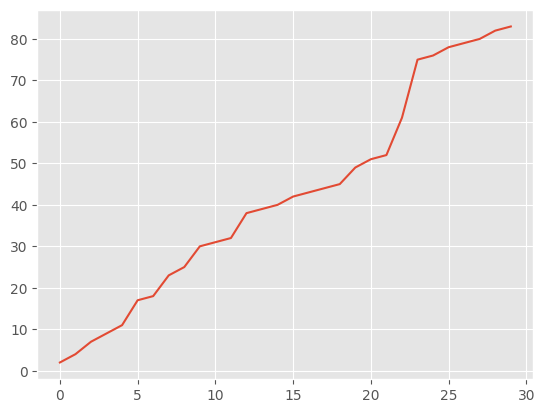

In [38]:
respuestas = posts.find({"PostTypeId": 2}).limit(30)
df = pd.DataFrame(respuestas)
df['Id'].plot()

La función `find()` tiene un gran número de posibilidades para especificar la búsqueda. Se pueden utilizar cualificadores complejos como:

- `$and`
- `$or`
- `$not`

Estos calificadores unen "objetos", no valores. Por otro lado, hay otros calificadores que se refieren a valores:

- `$lt` (menor)
- `$lte` (menor o igual)
- `$gt` (mayor)
- `$gte` (mayor o igual)

In [39]:
respuestas = posts.find({ '$and' : [ {"PostTypeId": 2} ,
                                    {"Id" : {'$gte' : 100}} ]}).limit(10)
list(respuestas)

[{'_id': ObjectId('653a79556adce16b55c6cd35'),
  'Id': 102,
  'AcceptedAnswerId': '',
  'AnswerCount': '',
  'Body': '<pre><code>$ git reset --soft HEAD~  o $ git reset --soft HEAD~1       #1<br/>// Cambios necesarios //                                    #2<br/>$ git add ...                                               #3<br/>$ git commit ...                                            #4<br/></code></pre><br/><br/><p>Simplemente haces un reset soft, con lo que te quedas con los cambios en local pero deshaces el commit, después haces lo que quieras y vuelves a hacer el commit como querías la primera vez.</p><br/>',
  'ClosedDate': None,
  'CommentCount': 0,
  'CommunityOwnedDate': None,
  'CreationDate': datetime.datetime(2015, 12, 1, 19, 0, 31, 680000),
  'FavoriteCount': '',
  'LastActivityDate': datetime.datetime(2015, 12, 1, 19, 0, 31, 680000),
  'LastEditDate': None,
  'LastEditorDisplayName': '',
  'LastEditorUserId': '',
  'OwnerDisplayName': '',
  'OwnerUserId': 178,
  'Parent

También hay operaciones específicas de la coleción, como `count()`, `groupby()` y `distinct()`:![distinct.bakedsvg.svg](https://github.com/dsevilla/bdge-data/raw/master/misc/mongo-distinct.png)

In [40]:
db.posts.distinct('Score')

[-13,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 41,
 42,
 43,
 44,
 46,
 47,
 48,
 49,
 52,
 53,
 54,
 55,
 62,
 63,
 69,
 77,
 89,
 94,
 98,
 106,
 174]

## Framework de Agregación

Framework de agregación: https://docs.mongodb.com/manual/reference/operator/aggregation/. Y aquí incluso un libro completo con usos prácticos de ejecutar agregación: https://www.practical-mongodb-aggregations.com/. A continuación otro vídeo interseante:

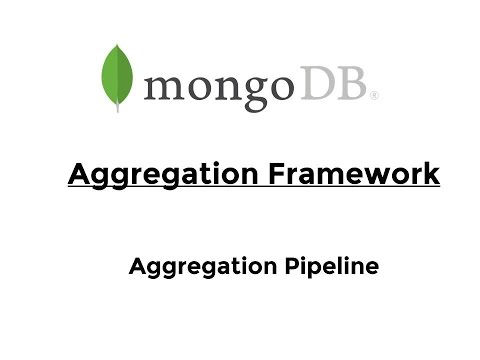

In [41]:
from IPython.display import YouTubeVideo
YouTubeVideo('VSX4a3h4SmQ',width=600)

![](https://miro.medium.com/max/1060/1*2lDBxvZ8Cr3JYkoODTa0lQ.png)

Proyección:

In [42]:
respuestas = db['posts'].aggregate( [
    {'$project' : { 'Id' : True }},
    {'$limit': 20} ])
list(respuestas)

[{'_id': ObjectId('653a79556adce16b55c6cce7'), 'Id': 1},
 {'_id': ObjectId('653a79556adce16b55c6cce8'), 'Id': 2},
 {'_id': ObjectId('653a79556adce16b55c6cce9'), 'Id': 3},
 {'_id': ObjectId('653a79556adce16b55c6ccea'), 'Id': 4},
 {'_id': ObjectId('653a79556adce16b55c6cceb'), 'Id': 5},
 {'_id': ObjectId('653a79556adce16b55c6ccec'), 'Id': 6},
 {'_id': ObjectId('653a79556adce16b55c6cced'), 'Id': 7},
 {'_id': ObjectId('653a79556adce16b55c6ccee'), 'Id': 8},
 {'_id': ObjectId('653a79556adce16b55c6ccef'), 'Id': 9},
 {'_id': ObjectId('653a79556adce16b55c6ccf0'), 'Id': 10},
 {'_id': ObjectId('653a79556adce16b55c6ccf1'), 'Id': 11},
 {'_id': ObjectId('653a79556adce16b55c6ccf2'), 'Id': 12},
 {'_id': ObjectId('653a79556adce16b55c6ccf3'), 'Id': 14},
 {'_id': ObjectId('653a79556adce16b55c6ccf4'), 'Id': 15},
 {'_id': ObjectId('653a79556adce16b55c6ccf5'), 'Id': 16},
 {'_id': ObjectId('653a79556adce16b55c6ccf6'), 'Id': 17},
 {'_id': ObjectId('653a79556adce16b55c6ccf7'), 'Id': 18},
 {'_id': ObjectId('653a

_Lookup_!

In [43]:
respuestas = posts.aggregate( [
        {'$match': { 'Score' : {'$gte': 40}}},
        {'$lookup': {
            'from': "users",
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"}
        }
        ])
list(respuestas)

[{'_id': ObjectId('653a79556adce16b55c6cd07'),
  'Id': 36,
  'AcceptedAnswerId': 40,
  'AnswerCount': 2,
  'Body': '<p>¿Cuál es la diferencia entre un <code>inner</code> y un <code>outer join</code>?</p><br/><br/><p>Y ¿cuál es la función de los modificadores <code>left</code>, <code>right</code> o <code>full</code>?</p><br/>',
  'ClosedDate': None,
  'CommentCount': 0,
  'CommunityOwnedDate': None,
  'CreationDate': datetime.datetime(2015, 11, 2, 15, 31, 51, 453000),
  'FavoriteCount': 14,
  'LastActivityDate': datetime.datetime(2017, 7, 27, 18, 24, 16, 747000),
  'LastEditDate': datetime.datetime(2017, 3, 4, 4, 23, 32, 177000),
  'LastEditorDisplayName': '',
  'LastEditorUserId': 29967,
  'OwnerDisplayName': '',
  'OwnerUserId': 21,
  'ParentId': '',
  'PostTypeId': 1,
  'Score': 54,
  'Tags': '<mysql><sql><join>',
  'Title': '¿Cuál es la diferencia entre un inner y un outer join?',
  'ViewCount': 6015,
  'owner': [{'_id': ObjectId('653a795a6adce16b55c7f6f2'),
    'Id': 21,
    'About

El `$lookup` genera un _array_ con todos los resultados. El operador `$arrayElementAt` accede al primer elemento.

In [44]:
respuestas = db.posts.aggregate( [
        {'$match': { 'Score' : {'$gte': 40}}},
        {'$lookup': {
            'from': "users",
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"}
        },
        { '$project' :
        {
            'Id' : True,
            'Score' : True,
            'username' : {'$arrayElemAt' : ['$owner.DisplayName', 0]},
            'owner.DisplayName'  : True
        }}
        ])
list(respuestas)

[{'_id': ObjectId('653a79556adce16b55c6cd07'),
  'Id': 36,
  'Score': 54,
  'owner': [{'DisplayName': 'jachguate'}],
  'username': 'jachguate'},
 {'_id': ObjectId('653a79556adce16b55c6cd0b'),
  'Id': 40,
  'Score': 98,
  'owner': [{'DisplayName': 'jachguate'}],
  'username': 'jachguate'},
 {'_id': ObjectId('653a79556adce16b55c6cd2e'),
  'Id': 94,
  'Score': 44,
  'owner': [{'DisplayName': 'Jcl'}],
  'username': 'Jcl'},
 {'_id': ObjectId('653a79556adce16b55c6cd62'),
  'Id': 151,
  'Score': 47,
  'owner': [{'DisplayName': 'Hewbot'}],
  'username': 'Hewbot'},
 {'_id': ObjectId('653a79556adce16b55c6cd8b'),
  'Id': 197,
  'Score': 77,
  'owner': [{'DisplayName': 'Peter Olson'}],
  'username': 'Peter Olson'},
 {'_id': ObjectId('653a79556adce16b55c6cd8f'),
  'Id': 204,
  'Score': 106,
  'owner': [{'DisplayName': 'Konamiman'}],
  'username': 'Konamiman'},
 {'_id': ObjectId('653a79556adce16b55c6cda3'),
  'Id': 225,
  'Score': 43,
  'owner': [{'DisplayName': 'Jordi Castilla'}],
  'username': 'Jo

`$unwind` también puede usarse. "Desdobla" cada fila por cada elemento del array. En este caso, como sabemos que el array sólo contiene un elemento, sólo habrá una fila por fila original, pero sin el _array_. Finalmente se puede proyectar el campo que se quiera.

In [45]:
respuestas = db.posts.aggregate( [
        {'$match': { 'Score' : {'$gte': 40}}},
        {'$lookup': {
            'from': "users",
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"}
        },
        { '$unwind': '$owner'},
        { '$project' :
         {
             'Id' : True,
             'Score': True,
             'username': '$owner.DisplayName'
         }
        }
        ])
list(respuestas)

[{'_id': ObjectId('653a79556adce16b55c6cd07'),
  'Id': 36,
  'Score': 54,
  'username': 'jachguate'},
 {'_id': ObjectId('653a79556adce16b55c6cd0b'),
  'Id': 40,
  'Score': 98,
  'username': 'jachguate'},
 {'_id': ObjectId('653a79556adce16b55c6cd2e'),
  'Id': 94,
  'Score': 44,
  'username': 'Jcl'},
 {'_id': ObjectId('653a79556adce16b55c6cd62'),
  'Id': 151,
  'Score': 47,
  'username': 'Hewbot'},
 {'_id': ObjectId('653a79556adce16b55c6cd8b'),
  'Id': 197,
  'Score': 77,
  'username': 'Peter Olson'},
 {'_id': ObjectId('653a79556adce16b55c6cd8f'),
  'Id': 204,
  'Score': 106,
  'username': 'Konamiman'},
 {'_id': ObjectId('653a79556adce16b55c6cda3'),
  'Id': 225,
  'Score': 43,
  'username': 'Jordi Castilla'},
 {'_id': ObjectId('653a79556adce16b55c6cda4'),
  'Id': 226,
  'Score': 69,
  'username': 'Jordi Castilla'},
 {'_id': ObjectId('653a79556adce16b55c6ce02'),
  'Id': 331,
  'Score': 48,
  'username': 'Jordi Castilla'},
 {'_id': ObjectId('653a79556adce16b55c6ce46'),
  'Id': 402,
  'Scor

Se pueden crear más índices, de tipos `ASCENDING`, `DESCENDING`, `HASHED`, y otros geoespaciales. https://api.mongodb.com/python/current/api/pymongo/collection.html#pymongo.collection.Collection.create_index

In [ ]:
posts.create_index([('Id', pymongo.HASHED)])

## EJERCICIO: Separar en dos colecciones las preguntas de las respuestas

## EJERCICIO: Con Agregación, mostrar las consulta RQ1 de la sesión 2